# Importing Packages

In [83]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 
from scipy.special import boxcox1p
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer



## Reading Train and test data 

In [3]:
test_data = pd.read_csv("~/Pet_Projects/House_price_predictions/house-prices-raw/test.csv")
train_data = pd.read_csv("~/Pet_Projects/House_price_predictions/house-prices-raw/train.csv")
print("Train_data_head")
train_y = train_data['SalePrice']
train_x = train_data.drop('SalePrice',1)
test_x = test_data
df_prepare = pd.concat([train_x,test_x]).reset_index(drop = True) 
df_prepare.drop('Id',1,inplace=True)
len(train_x.columns)
#df_prepare

Train_data_head


80

## Missing Data Distribution 

In [4]:
def missing_data_distribution(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing = missing/len(df_prepare)
    missing.sort_values(ascending = False, inplace=True)
    missing = missing * 100
    missing.plot.bar()
    print(missing.head(20))

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageYrBlt      5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
dtype: float64


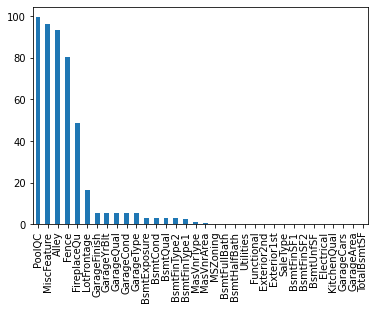

In [5]:
missing_data_distribution(df_prepare)

In [6]:
## PoolQC , Alley , Fence , MiscFeature ,FireplaceQu Missing for more than 50% of the data 
columns_to_be_dropped = ['MiscFeature']


## Seperating  Numeric and CategoricalData

In [7]:
def seperating_data(df):
    numeric_data = df.select_dtypes(include=[np.number])
    categorical_data = df.select_dtypes(exclude=[np.number])
    print(numeric_data.head())
    print(categorical_data.head())
    return numeric_data,categorical_data
#categorical_data.head()

In [8]:
numeric_data,categorical_data = seperating_data(df_prepare)

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0          2003       196.0       706.0         0.0  ...       548.0   
1          1976         0.0       978.0         0.0  ...       460.0   
2          2002       162.0       486.0         0.0  ...       608.0   
3          1970         0.0       216.0         0.0  ...       642.0   
4          2000       350.0       655.0         0.0  ...       836.0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61     

## Impute missing values using SimpleImputer (Mean Value)

In [9]:

def numerical_impute(df):
    my_imputer = SimpleImputer()
    new_data_1 = df.copy()
    my_imputer = SimpleImputer()
    new_data_1 = pd.DataFrame(my_imputer.fit_transform(new_data_1))
    new_data_1.columns = numeric_data.columns
    new_data_1.index = numeric_data.index
    missing_new = new_data_1.isnull().sum()
    print(missing_new)
    return new_data_1


In [10]:
numeric_data = numerical_impute(numeric_data)

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64


In [11]:
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data


In [12]:
def categorical_impute(df):
    #instantiate both packages to use
    encoder = OrdinalEncoder()
    imputer = IterativeImputer(ExtraTreesRegressor())
    #create a list of categorical columns to iterate over
    cat_cols = df.columns

    def encode(data):
        '''function to encode non-null data and replace it in the original data'''
        #retains only non-null values
        nonulls = np.array(data.dropna())
        #reshapes the data for encoding
        impute_reshape = nonulls.reshape(-1,1)
        #encode date
        impute_ordinal = encoder.fit_transform(impute_reshape)
        #Assign back encoded values to non-null values
        data.loc[data.notnull()] = np.squeeze(impute_ordinal)
        return data

    #create a for loop to iterate through each column in the data
    for columns in cat_cols:
        encode(df[columns])
    encode_data = pd.DataFrame(np.round(imputer.fit_transform(df)),columns = df.columns)
    return encode_data


In [13]:
new_data_2 = categorical_data.copy()
a = categorical_impute(new_data_2)
print(a)
# encode_data

/home/naruto_uzumaki/Pet_Projects/env/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/naruto_uzumaki/Pet_Projects/env/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/naruto_uzumaki/Pet_Projects/env/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

/home/naruto_uzumaki/Pet_Projects/env/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


      MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0          3.0     1.0    1.0       3.0          3.0        0.0        4.0   
1          3.0     1.0    0.0       3.0          3.0        0.0        2.0   
2          3.0     1.0    1.0       0.0          3.0        0.0        4.0   
3          3.0     1.0    0.0       0.0          3.0        0.0        0.0   
4          3.0     1.0    1.0       0.0          3.0        0.0        2.0   
...        ...     ...    ...       ...          ...        ...        ...   
2914       4.0     1.0    0.0       3.0          3.0        0.0        4.0   
2915       4.0     1.0    0.0       3.0          3.0        0.0        4.0   
2916       3.0     1.0    0.0       3.0          3.0        0.0        4.0   
2917       3.0     1.0    1.0       3.0          3.0        0.0        4.0   
2918       3.0     1.0    0.0       3.0          3.0        0.0        4.0   

      LandSlope  Neighborhood  Condition1  ...  GarageType  Gar

In [14]:
## Feature Engineering Ideas :: Age of the house


## Concat both numerical and categorical data

In [15]:
df_imputed = pd.concat([numeric_data.reset_index(drop=True), categorical_data], axis=1)
df_imputed.fillna('None', inplace = True) 
missing_new = df_imputed.isnull().sum()
missing_new.sort_values(ascending=False,inplace=True)
missing_new.head(100)

SaleCondition    0
OpenPorchSF      0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
                ..
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
MSSubClass       0
Length: 79, dtype: int64

In [16]:
from scipy.stats import skew
from scipy import stats
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import PowerTransformer

In [17]:
def numericorcategorical(dt):
    dt_columns=dt.columns
    for c in dt_columns:
        print(c)
        if dt[c].dtype != "object":
            dt[c] = Normalize(dt[c],2)
        else:
            onehot_encoded = OneHot(dt[c], c)
            dt = dt.join(onehot_encoded)
            dt = dt.drop([c], axis=1)
    return dt

In [18]:
def Normalize(X_skewed, skew_threshold = 2):
    if skew(X_skewed)>abs(skew_threshold):
        #X_Normalized, m = stats.boxcox(X_skewed)
        pt = PowerTransformer()
        X_Normalized=pt.fit_transform(X_skewed.values.reshape(-1,1))
        return X_Normalized
    else:
        return X_skewed


def OneHot(X_column, column_name):
    #Labe Encoding
    lbl = LabelEncoder() 
    lbl.fit(list(X_column.values)) 
    X_labelencoded = lbl.transform(list(X_column.values))
    #One Hot encoding
    onehot_encoded=pd.get_dummies(X_labelencoded, prefix=column_name)
    #onehot_encoder = OneHotEncoder(sparse=False)
    #onehot_encoded = onehot_encoder.fit_transform(X_labelencoded.reshape(-1,1))
    return onehot_encoded

In [19]:
(df_imputed['MasVnrArea']==0).value_counts()

True     1738
False    1181
Name: MasVnrArea, dtype: int64

In [20]:
dt_final=numericorcategorical(df_imputed)
print(dt_final.head())

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1


/home/naruto_uzumaki/Pet_Projects/env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition
   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        60.0         65.0      0.0          7.0          5.0     2003.0   
1        20.0         80.0      0.0          6.0          8.0     1976.0   
2        60.0         68.0    

# Developing Model Functions :: 

In [ ]:
# from sklearn.model_selection import train_test_split

# def train_test_split(X,y,size)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state = 0)
#     return X_train, X_test, y_train, y_test


In [ ]:
# space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
#         'gamma': hp.uniform ('gamma', 1,9),
#         'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
#         'reg_lambda' : hp.uniform('reg_lambda', 0,1),
#         'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
#         'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
#         'n_estimators': 180,
#         'seed': 0
#     }

In [ ]:
# def objective(space):
#      qclf=xgb.XGBClassifier(
#                     n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
#                     reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
#                     colsample_bytree=int(space['colsample_bytree']))
    
#     evaluation = [( X_train, y_train), ( X_test, y_test)]
    
#     clf.fit(X_train, y_train,
#             eval_set=evaluation, eval_metric="auc",
#             early_stopping_rounds=10,verbose=False)
    

#     pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test, pred>0.5)
#     print ("SCORE:", accuracy)
#     scores = {'loss': -accuracy, 'status': STATUS_OK }
#     return scores  

In [21]:
## preparing for data selection ::

In [27]:
length = len(train_x)


In [29]:
len(dt_final)
Train , Test = dt_final.loc[:length - 1,:] , dt_final.loc[length:,:]
Train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_6', 'SaleType_7', 'SaleType_8', 'SaleType_9',
       'SaleCondition_0', 'SaleCondition_1', 'SaleCondition_2',
       'SaleCondition_3', 'SaleCondition_4', 'SaleCondition_5'],
      dtype='object', length=310)

In [85]:
X = Train.loc[:,:].values
y = np.log(train_y.values)


# Using XGboost for Regression

In [86]:
## https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f


In [87]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1, random_state=42)


In [88]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [89]:
from sklearn.metrics import mean_absolute_error

In [90]:
import numpy as np
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))


Baseline MAE is 0.34


In [91]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}
params['eval_metric'] = "mae"
num_boost_round = 999

In [92]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)
print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))


[22:57:30] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:8.05769
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:5.64252
[2]	Test-mae:3.94939
[3]	Test-mae:2.76942
[4]	Test-mae:1.94415
[5]	Test-mae:1.36228
[6]	Test-mae:0.95684
[7]	Test-mae:0.67547
[8]	Test-mae:0.48137
[9]	Test-mae:0.34418
[10]	Test-mae:0.25022
[11]	Test-mae:0.19041
[12]	Test-mae:0.15350
[13]	Test-mae:0.12955
[14]	Test-mae:0.11662
[15]	Test-mae:0.10814
[16]	Test-mae:0.10359
[17]	Test-mae:0.10020
[18]	Test-mae:0.09853
[19]	Test-mae:0.09736
[20]	Test-mae:0.09602
[21]	Test-mae:0.09578
[22]	Test-mae:0.09503
[23]	Test-mae:0.09398
[24]	Test-mae:0.09407
[25]	Test-mae:0.09452
[26]	Test-mae:0.09413
[27]	Test-mae:0.09371
[28]	Test-mae:0.09312
[29]	Test-mae:0.09343
[30]	Test-mae:0.09361
[31]	Test-mae:0.09374
[32]	Test-mae:0.09302
[33]	Test-mae:0.09302
[34]	Test-mae:0.09279
[35]	Test-mae:0.09259
[36]	Test-mae:0.09225
[37]	Test-mae

## Using XGBoost’s CV

In [93]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
print(cv_results)
print(cv_results['test-mae-mean'].min())

[22:57:36] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:36] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:36] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:37] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:37] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
    train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0         8.071009       0.003121       8.071010      0.019145
1         5.654342       0.002186       5.654342      0.018167
2         3.961253       0.001533       3.961131      0.015765
3         2.775362       0.001304       2.775512      0.016015
4         1.945465       0.000842       1.948168  

## Parameters max_depth and min_child_weight

In [94]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [95]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[22:57:53] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:53] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:53] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:53] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:53] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.10106319999999999 for 39 rounds
CV with max_depth=9, min_child_weight=6
[22:57:59] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:59] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:square

In [96]:
params['max_depth'] = best_params[0]
params['min_child_weight'] = best_params[1]


## Parameters subsample and colsample_bytree

In [97]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [98]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[22:59:16] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:59:16] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:59:16] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:59:16] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:59:16] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.0964478 for 37 rounds
CV with subsample=1.0, colsample=0.9
[22:59:23] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:59:23] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:59:2

	MAE 0.10176160000000001 for 38 rounds
CV with subsample=0.7, colsample=1.0
[23:00:36] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:00:36] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:00:36] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:00:36] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:00:36] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.1012702 for 27 rounds
CV with subsample=0.7, colsample=0.9
[23:00:43] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:00:43] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated

In [99]:
params['subsample'] = best_params[0]
params['colsample_bytree'] = best_params[1]

## Parameter ETA

In [100]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['mae'],
            early_stopping_rounds=10
          )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))    


CV with eta=0.3
[23:02:30] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:02:30] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:02:30] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:02:30] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:02:30] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.0964478 for 37 rounds

CV with eta=0.2
[23:02:40] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:02:40] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:02:40] WARNING: /workspace/src/objective/regr

In [101]:
params['eta'] = best_params

# Results

In [102]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[23:09:20] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:10.93683
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:10.38977
[2]	Test-mae:9.87004
[3]	Test-mae:9.37628
[4]	Test-mae:8.90792
[5]	Test-mae:8.46295
[6]	Test-mae:8.04018
[7]	Test-mae:7.63853
[8]	Test-mae:7.25665
[9]	Test-mae:6.89411
[10]	Test-mae:6.54941
[11]	Test-mae:6.22300
[12]	Test-mae:5.91228
[13]	Test-mae:5.61692
[14]	Test-mae:5.33706
[15]	Test-mae:5.07039
[16]	Test-mae:4.81782
[17]	Test-mae:4.57734
[18]	Test-mae:4.34866
[19]	Test-mae:4.13187
[20]	Test-mae:3.92619
[21]	Test-mae:3.73020
[22]	Test-mae:3.54354
[23]	Test-mae:3.36663
[24]	Test-mae:3.19936
[25]	Test-mae:3.03936
[26]	Test-mae:2.88764
[27]	Test-mae:2.74312
[28]	Test-mae:2.60684
[29]	Test-mae:2.47707
[30]	Test-mae:2.35337
[31]	Test-mae:2.23570
[32]	Test-mae:2.12483
[33]	Test-mae:2.01868
[34]	Test-mae:1.91871
[35]	Test-mae:1.82265
[36]	Test-mae:1.73120
[37]	Test-m

In [103]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[23:09:56] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:10.93683
[1]	Test-mae:10.38977
[2]	Test-mae:9.87004
[3]	Test-mae:9.37628
[4]	Test-mae:8.90792
[5]	Test-mae:8.46295
[6]	Test-mae:8.04019
[7]	Test-mae:7.63853
[8]	Test-mae:7.25665
[9]	Test-mae:6.89411
[10]	Test-mae:6.54941
[11]	Test-mae:6.22300
[12]	Test-mae:5.91228
[13]	Test-mae:5.61692
[14]	Test-mae:5.33706
[15]	Test-mae:5.07039
[16]	Test-mae:4.81782
[17]	Test-mae:4.57734
[18]	Test-mae:4.34866
[19]	Test-mae:4.13187
[20]	Test-mae:3.92619
[21]	Test-mae:3.73020
[22]	Test-mae:3.54354
[23]	Test-mae:3.36663
[24]	Test-mae:3.19936
[25]	Test-mae:3.03936
[26]	Test-mae:2.88764
[27]	Test-mae:2.74312
[28]	Test-mae:2.60684
[29]	Test-mae:2.47707
[30]	Test-mae:2.35337
[31]	Test-mae:2.23570
[32]	Test-mae:2.12483
[33]	Test-mae:2.01868
[34]	Test-mae:1.91871
[35]	Test-mae:1.82265
[36]	Test-mae:1.73120
[37]	Test-mae:1.64454
[38]	Test-mae:1.56271
[39]	Test-mae:1.48490
[

In [106]:
print(mean_absolute_error(best_model.predict(dtest), y_test))
print(len(y_test))
print(mean_absolute_error(best_model.predict(dtest), y_test)/len(y_test))


0.07902815558078834
146
0.0005412887368547146


In [109]:
print(mean_absolute_error(np.exp(best_model.predict(dtest)), np.exp(y_test)))
print(len(y_test))
print(mean_absolute_error(np.exp(best_model.predict(dtest)), np.exp(y_test))/len(y_test))


15090.705854023981
146
103.36099900016426


<AxesSubplot:>

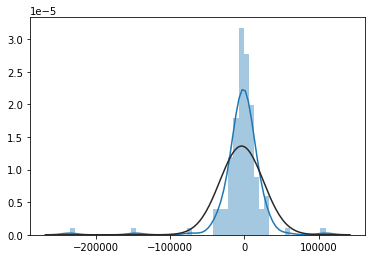

In [111]:
y_pred_actual = np.exp(best_model.predict(dtest))
y_test_actual = np.exp(y_test)
#error = y_pred - y_test
error = np.exp(y_pred) - np.exp(y_test)
#np.exp(y_pred)
#print(error.min())
#print(error.max())
#print(error.std())
binwidth = (error.max() - error.min()) / 50
#plt.hist(error, bins=np.arange(min(error), max(error) + binwidth, binwidth))
sns.distplot(error , fit=norm)

In [112]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_pred_actual, y_test_actual)


0.0123646026957721

In [ ]:
best_model.save_model("my_model.model")

In [ ]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
# And use it for predictions.
loaded_model.predict(dtest)